In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
import urllib.request
from tqdm import tqdm
import pandas as pd
import multiprocessing
import scipy.stats as sstats

%matplotlib inline


In [2]:
class PBIL:
    def __init__(self, cost_function, d, N, T1, T2, T3, iterations=1000):
        self.cost_function = cost_function
        self.d = d    # chromosome's length
        self.N = N    # population size
        self.T1 = T1  # learning coeficient
        self.T2 = T2  # mutation probability
        self.T3 = T3  # mutation distortion probability
        self.iterations = iterations
        self.scores = []
        self.ps = []  # probability vectors through iterations

        # initial probability vector
        self.p = np.ones(self.d) / 2
        self.Population = np.random.rand(self.N, self.d) < self.p  # population
        # population evaluation
        self.cost = self.cost_function(self.Population)

    def run(self):
        for i in tqdm(range(self.iterations), desc='PBIL', position=0):
            best = self.Population[np.argmax(self.cost)]
            self.p = self.p * (1 - self.T1) + best * self.T1

            self.p = np.array([self.p[i] * (1 - self.T3) + (np.random.rand() < 0.5) * self.T3
                               if np.random.rand() < self.T2
                               else self.p[i]
                               for i in range(self.d)])

            self.Population = np.random.rand(self.N, self.d) < self.p
            self.cost = self.cost_function(self.Population)

            self.ps.append(self.p)
            self.scores.append(
                [self.cost.max(), self.cost.mean(), self.cost.min()])

    def plot_res(self, title=''):
        fig, ax = plt.subplots(1, 2, figsize=(15, 5))
        fig.suptitle(title)

        ax[0].plot(np.arange(self.iterations), np.array(self.scores)
                   [:, 0], color='green', label='Best')
        ax[0].plot(np.arange(self.iterations), np.array(self.scores)
                   [:, 1], color='red', label='Average')
        ax[0].plot(np.arange(self.iterations), np.array(
            self.scores)[:, 2], color='blue', label='Worst')
        ax[0].legend(loc='lower right')
        ax[0].set_title('Cost function')

        ax[1].plot(np.arange(self.iterations), np.array(self.ps))
        ax[1].set_title('Probabilities')

        plt.show()


# Input

In [3]:
image = np.loadtxt('lista01/ImageRawReduced.txt')
true_image = np.loadtxt('lista01/ImageExpertReduced.txt')
classification_rules = np.loadtxt('lista01/ClassificationRules.txt')

In [6]:
print(image.shape)
print(true_image.shape)
print(classification_rules.shape)

(3, 9350)
(9350,)
(266, 9350)


In [15]:
image = image.T

In [56]:
def cost_function(Population, classification_rules=classification_rules, true_image=true_image):
   evaluations = []
   for osobnik in Population:
      selected_rules = classification_rules[osobnik == 1]
      selected_classes = sstats.mode(selected_rules, axis=0)[0]  # (mode array, count array)
      evaluations.append((selected_classes == true_image).sum() / true_image.size)
   return np.array(evaluations)

In [50]:
a = PBIL(cost_function=cost_function, d=266, N=100, T1=0.05, T2=0.01, T3=0.01, iterations=10)
a.run()

PBIL: 100%|██████████| 10/10 [04:16<00:00, 25.65s/it]


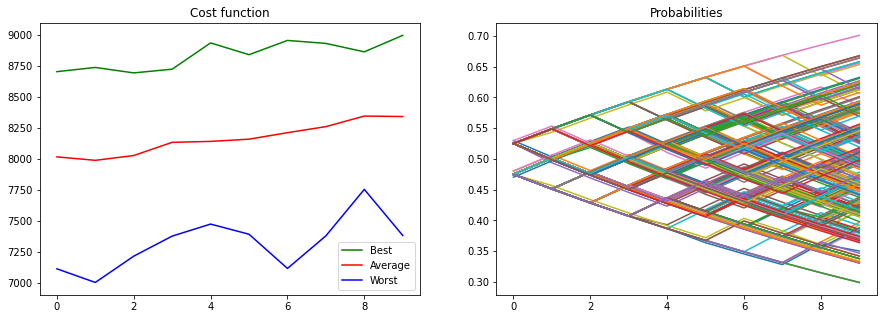

8999

In [51]:
a.plot_res()
a.scores[-1][0]

In [57]:
b = PBIL(cost_function=cost_function, d=266, N=100,
         T1=0.1, T2=0.01, T3=0.01, iterations=10)
b.run()


PBIL: 100%|██████████| 10/10 [04:28<00:00, 26.84s/it]


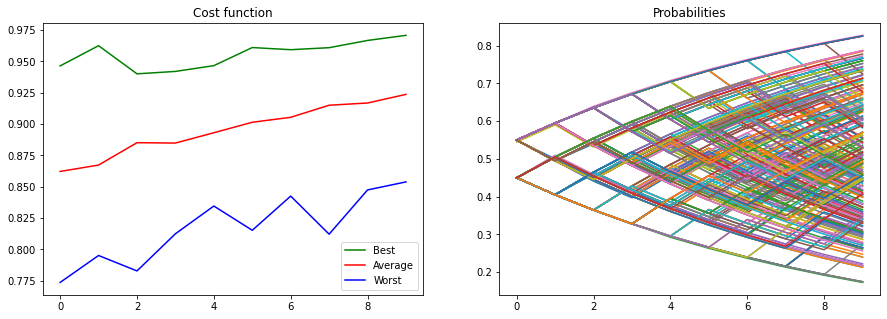

0.9708021390374332

In [58]:
b.plot_res()
b.scores[-1][0]

In [59]:
c = PBIL(cost_function=cost_function, d=266, N=100,
       T1=0.1, T2=0.05, T3=0.05, iterations=10)
c.run()

PBIL: 100%|██████████| 10/10 [04:16<00:00, 25.65s/it]


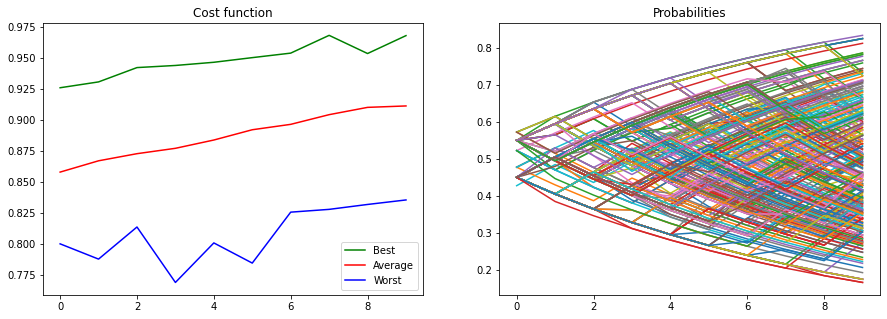

0.9679144385026738

In [60]:
c.plot_res()
c.scores[-1][0]

In [61]:
final = PBIL(cost_function=cost_function, d=266, N=100,
             T1=0.1, T2=0.01, T3=0.01, iterations=1000)


PBIL: 100%|██████████| 1000/1000 [7:02:36<00:00, 25.36s/it]


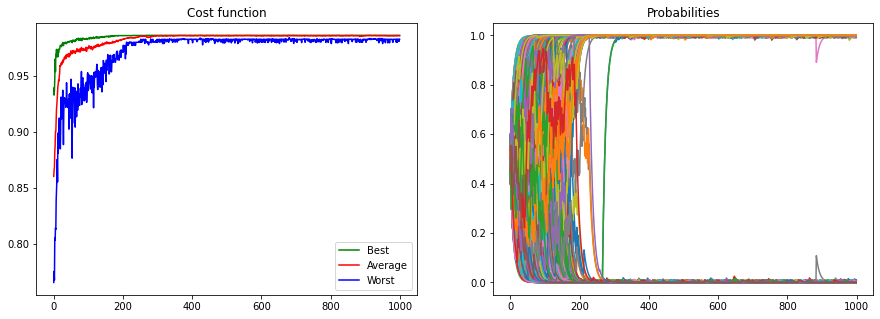

0.9864171122994653

In [62]:
final.run()
final.plot_res()
final.scores[-1][0]